<b> Internal Diversion <b>

All Import Statements

In [52]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100
from itertools import islice
import urllib2
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from DatumBox import DatumBox
import re
from urlparse import urlparse
import seaborn as sns # To have more than seven colors in pie diagram
import plotly.plotly as py # For Gantt Chart
import plotly.figure_factory as ff # For Gantt Chart
import sklearn

<h2>1. Text Similarity Comparison </h2>

<b style = "color : red" > 1. Read the Data from the CSV file with pandas </b>

In [53]:
df = pd.read_csv('lab_pc5.csv')

#To Reverse The Dataframe rows 
df = df.sort_index(axis=1 ,ascending=True)
df = df.iloc[::-1]
df = df.sort_index(ascending=True, axis=0)
df = df.reindex(index=df.index[::-1])
df.head()


#test_data.pop('[]"_id"')
#test_data.pop('<ROOT>_id')
#test_data.pop('typedCount')
test_data = df

test_data.head()

,id,lastVisitTime,title,typedCount,url,visitCount
211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,0,https://stackoverflow.com/questions/18649512/u...,1
210,422,7/4/2017 5:59:29 PM,UnicodeDecodeError: 'ascii' codec can't decode...,0,https://www.google.co.in/search?q=UnicodeDecod...,1
209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,0,https://stackoverflow.com/questions/21129020/h...,1
208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,0,https://sourceforge.net/projects/numpy/files//...,1
207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,0,https://sourceforge.net/projects/numpy/files/N...,1


<b style = "color : red" > 3. Cleaning up the data by removing the unwanted fields </b>

In [54]:
#test_data = test_data.drop(['[]"_id"','<ROOT>_id','typedCount','id'],axis=1)
#data = data.dropna()
#data.drop(48)
#test_data.pop('visitCount')
test_data.pop('typedCount')
test_data.head()

,id,lastVisitTime,title,url,visitCount
211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,https://stackoverflow.com/questions/18649512/u...,1
210,422,7/4/2017 5:59:29 PM,UnicodeDecodeError: 'ascii' codec can't decode...,https://www.google.co.in/search?q=UnicodeDecod...,1
209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,https://stackoverflow.com/questions/21129020/h...,1
208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,https://sourceforge.net/projects/numpy/files//...,1
207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,https://sourceforge.net/projects/numpy/files/N...,1


<b style = "color : red" >4. Calculating the amount of time spent on each URL</b>

In [55]:
i_max = test_data.shape[0]
time_diff = []

for i in range (i_max-1,0,-1):
    j = i-1
    i_base = test_data.iloc[i]['lastVisitTime']
    j_base = test_data.iloc[j]['lastVisitTime']
    if (i_base.split('/')[0] == j_base.split('/')[0] ):
        if (i_base .split('/')[1] == j_base.split('/')[1] ):
            if (i_base.split('/')[2].split(' ')[1].split(':')[0] == j_base.split('/')[2].split(' ')[1].split(':')[0]):
                j_min = int (j_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                j_sec = int (j_base.split('/')[2].split(' ')[1].split(':')[2])
                j_time = j_min + j_sec
            

                i_min = int (i_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                i_sec = int (i_base.split('/')[2].split(' ')[1].split(':')[2])
                i_time = i_min + i_sec
            
                time_diff.append(j_time - i_time)
            else:
                time_diff.append('NA')
        else:
             time_diff.append('NA')
    else:
         time_diff.append('NA')

time_diff.append('NA')

time_diff = time_diff[::-1]
td = pd.Series(time_diff)
test_data['timeSpent'] = td.values

#Applying modulus to the time difference 
for i in range(0,i_max-1):
    if (str(test_data.loc[i]['timeSpent']) is not 'NA'):
            #test_data.loc[i,'timeSpent'] = abs(int(test_data.loc[i,'timeSpent']))
            temp = int(test_data.loc[i]['timeSpent'])
            test_data.loc[i,'timeSpent'] = abs(temp)
            
test_data.head()


,id,lastVisitTime,title,url,visitCount,timeSpent
211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,https://stackoverflow.com/questions/18649512/u...,1,NA
210,422,7/4/2017 5:59:29 PM,UnicodeDecodeError: 'ascii' codec can't decode...,https://www.google.co.in/search?q=UnicodeDecod...,1,254
209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,https://stackoverflow.com/questions/21129020/h...,1,3
208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,https://sourceforge.net/projects/numpy/files//...,1,NA
207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,https://sourceforge.net/projects/numpy/files/N...,1,89


<b style = "color : red" >5. Finding Internal Category</b>

In [56]:
test_data['Internal_category'] = ""
for i in range(0,len(test_data)):
    temp = test_data['url'][i]
    if("facebook" in temp):
        test_data['Internal_category'][i] = "Social Network"
    elif ("Facebook" in temp):
        test_data['Internal_category'][i] = "Social Network"
    elif("google" in temp):
        test_data['Internal_category'][i] = "Search"
    elif("gmail" in temp):
        test_data['Internal_category'][i] = "Mail"
    elif('home' in temp):
        test_data['Internal_category'][i] = "Local"
    else:
        test_data['Internal_category'][i] = "General"  
    
test_data.head()

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category
211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,https://stackoverflow.com/questions/18649512/u...,1,NA,General
210,422,7/4/2017 5:59:29 PM,UnicodeDecodeError: 'ascii' codec can't decode...,https://www.google.co.in/search?q=UnicodeDecod...,1,254,Search
209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,https://stackoverflow.com/questions/21129020/h...,1,3,General
208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,https://sourceforge.net/projects/numpy/files//...,1,NA,General
207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,https://sourceforge.net/projects/numpy/files/N...,1,89,General


<b style = "color : red" >6. Finding the Sessions</b>

In [57]:
count = 0

test_data['session'] = ""
for i in range(0,len(test_data)):
    if test_data['timeSpent'][i] is 'NA':
        count+=1

    if (test_data['timeSpent'][i] is not 'NA'):
        test_data['session'][i] = count
    else:
        test_data['session'][i] = 0
    

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



<b style = "color : green" >(I) Text Extract Function</b>

In [58]:
import urllib2
from bs4 import BeautifulSoup

# Clean Up Function
def clean_up(text1):
    char_dic = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    temp = []
    res = ""
    temp = text1.split(' ')

    for i in temp:
        flag = 0
        for j in str(i):
            if j not in char_dic:
                flag += 1
        if (flag == 0):
            res += i
        res += " "
            
    return res

def text_extract(url):
    try:
        page3 = urllib2.urlopen(url).read()
    
        soup3 = BeautifulSoup(page3,"html.parser")

        final_res = ""
        #If-Else Condition to Check null case
        if (soup3 is None):
            print "Its NONE!"
        else:
     
            
            if (soup3.h1 is not None):
                if (clean_up(str(soup3.h1)) is not None):
                    final_res += clean_up(str(soup3.h1))
            
            if (soup3.h2 is not None):
                if (clean_up(str(soup3.h2)) is not None):
                    final_res += clean_up(str(soup3.h2))
            
            if (soup3.h3 is not None):
                if (clean_up(str(soup3.h3)) is not None):
                    final_res += clean_up(str(soup3.h3))

            if (soup3.h4 is not None):
                if (clean_up(str(soup3.h4)) is not None):
                    final_res += clean_up(str(soup3.h4))

            if (soup3.h5 is not None):
                if (clean_up(str(soup3.h5)) is not None):
                    final_res += clean_up(str(soup3.h5))

            if (soup3.h6 is not None):
                if (clean_up(str(soup3.h6)) is not None):
                    final_res += clean_up(str(soup3.h6))
            

            if (soup3.p is not None):
                if (clean_up(str(soup3.p)) is not None):
                    final_res += clean_up(str(soup3.p))
            

            if(soup3.title is not None):
                if (clean_up(str(soup3.title)) is not None):
                    final_res += clean_up(str(soup3.title))
            

            flag = ""

            if(soup3.p is not None):
                for node in soup3.findAll('p'):
                    flag += ''.join(node.findAll(text=True))

                z = clean_up(str(flag.encode('utf-8')))
                if(z is not None):
                    final_res += z
            

            desc = soup3.findAll(attrs={"name":"description"}) 
            if (len(desc) > 0):
                zi = clean_up(str(desc[0]['content'].encode('utf-8')))
                if (zi is not None):
                    final_res+= zi 
            else:
                print "DESCRIPTION IS NONE!"

        
        return final_res
        
    except urllib2.HTTPError as err:
        print "Error Occured!"
        return 0


    
#print text_extract("http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.130.8327")



In [59]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

def find_cos_sim(url1,url2):

    text1 = text_extract(url1)
    text2 = text_extract(url2)

    from nltk.corpus import stopwords

    cachedStopWords = stopwords.words("english")
    
    text1 = str(text1)
    text2 = str(text2)
    
    text1= ' '.join([word for word in text1.split() if word not in stopwords.words("english")])
    text2= ' '.join([word for word in text2.split() if word not in stopwords.words("english")])
    


    from nltk import PorterStemmer
    text1 = PorterStemmer().stem(text1)
    text2 = PorterStemmer().stem(text2)

    text1_vec = text1.split(' ')
    text2_vec = text2.split(' ')

    for i in range(0,len(text1_vec)):
        text1_vec[i] = PorterStemmer().stem(text1_vec[i])

    for i in range(0,len(text2_vec)):
        text2_vec[i] = PorterStemmer().stem(text2_vec[i])


    text1_str = ""
    text2_str = ""

    for i in text1_vec:
        text1_str = text1_str + " " + i

    for i in text2_vec:
        text2_str = text2_str + " " + i

    vector1 = text_to_vector(text1_str)
    vector2 = text_to_vector(text2_str)

    cosine = get_cosine(vector1, vector2)

    return cosine

#print find_cos_sim("https://en.wikipedia.org/wiki/Spider-Man","https://en.wikipedia.org/wiki/Batman")


<b style = "color : green" >(II) Function to extract data for finding Cosine Similarity</b>

In [60]:
sample_data = test_data
sample_data['sim_val'] = 0.0

In [61]:
sample_data

,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,session,sim_val
211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,https://stackoverflow.com/questions/18649512/u...,1,NA,General,0,0.0
210,422,7/4/2017 5:59:29 PM,UnicodeDecodeError: 'ascii' codec can't decode...,https://www.google.co.in/search?q=UnicodeDecod...,1,254,Search,16,0.0
209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,https://stackoverflow.com/questions/21129020/h...,1,3,General,16,0.0
208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,https://sourceforge.net/projects/numpy/files//...,1,NA,General,0,0.0
207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,https://sourceforge.net/projects/numpy/files/N...,1,89,General,15,0.0
206,429,7/4/2017 6:09:36 PM,Numerical Python - Browse Files at SourceForge...,https://sourceforge.net/projects/numpy/files/,2,3,General,15,0.0
205,431,7/4/2017 6:09:40 PM,Download Statistics: NumPy,https://sourceforge.net/projects/numpy/files/N...,1,4,General,15,0.0
204,432,7/4/2017 6:09:59 PM,python - ImportError: No module named 'numpy' ...,https://stackoverflow.com/questions/38415459/i...,1,19,General,15,0.0
203,434,7/4/2017 6:10:18 PM,Installing Packages — Python Packaging User Guide,https://packaging.python.org/tutorials/install...,1,19,General,15,0.0
202,435,7/4/2017 6:10:54 PM,python - Import Error: no module named numpy (...,https://stackoverflow.com/questions/42190527/i...,1,36,General,15,0.0


In [62]:
from requests import get

sss_url = "http://swoogle.umbc.edu/SimService/GetSimilarity"

def sss(s1, s2, type='relation', corpus='webbase'):
    try:
        response = get(sss_url, params={'operation':'api','phrase1':s1,'phrase2':s2,'type':type,'corpus':corpus})
        return float(response.text.strip())
    except:
        print 'Error in getting similarity for %s: %s' % ((s1,s2), response)
        return 0.0


In [63]:
import urllib
from bs4 import BeautifulSoup
import csv
import urllib2
import re
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
from itertools import chain
from nltk.corpus import stopwords
from DatumBox import DatumBox
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
datum_box = DatumBox("2a13913dda346761765020c1f66e34f8")
TAG_RE = re.compile(r"<[^>]+>")
nltk.download('punkt')
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
cachedStopWords = stopwords.words("english")

def remove_tags(text):
    return TAG_RE.sub('', text)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

def main_text(url):
    html = urllib.urlopen(url).read()
    soup = BeautifulSoup(html,"html.parser")

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    for char in text:
        if(not((ord(char) >= 97 and ord(char) <= 122) or (ord(char) >= 65 and ord(char) <= 90))):
            text = text.replace (char," ")
    return text

def openfile(f):
    x = []
    y = []
    finial = []; i=2
    csvfile = open(f,'rb')
    reader = csv.DictReader(csvfile)
    text1='';text2='';text1_main='';text2_main=''
    synonyms=None
    for row in reader:
        synonyms=None
        if i==0:
            print str(round(cosine_sim(text1,text2),2))+ "      " +str(round(cosine_sim(text1_main,text2_main),2))
            i=2
            text1='';text1_main=''
            text2='';text2_main=''
        elif i==1:
            text1 = main_text(row['url'])
            text1_main = text1 + ' '
            for j in text1.split(' '):
                synonyms = wordnet.synsets(j)
                synonyms = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
                for k in synonyms:
                    text1_main += k + ' '
            i-=1
        elif i==2:
            text2 = main_text(row['url'])
            text2_main = text2 + ' '
            for j in text2.split(' '):
                synonyms = wordnet.synsets(j)
                synonyms = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
                for k in synonyms:
                    text2_main += k + ' '
            i-=1
    print a
    csvfile.close()

#openfile('/home/chaitanya/Documents/Codes/IR_Vidhya mam/resources/input/10.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/sreeram_0xb5e/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:

def wordnet_similarity(a,b):
    url1 = a
    url2 = b
    text1='';text2='';text1_main='';text2_main=''
    text1 = main_text(url1)
    text2 = main_text(url2)
    word_count = 0;similar = 0
    text1_split = text1.split(' ');text2_split = text2.split(' ')
    text1_split = [x.upper() for x in text1_split if x]
    text2_split = [x.upper() for x in text2_split if x]
    similar = 0.0;word_count = 0.0;flag=0
    
    for j in text1_split:
        flag = 0
        if j not in text2_split:
            synonyms = wordnet.synsets(j)
            synonyms = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
            for k in synonyms:
                if k in text2_split:
                    flag = 1
        else:
            similar += 1
        if flag == 1:
            similar += 1
        word_count += 1

    for j in text2_split:
        flag = 0
        if j not in text1_split:
            synonyms = wordnet.synsets(j)
            synonyms = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
            for k in synonyms:
                if k in text1_split:
                    flag = 1
        else:
            similar += 1
        if flag == 1:
            similar += 1
        word_count += 1

    #text2_main += k + ' '

    return similar/word_count


<b style = "color : green" >(II) Finding Text Similarity Value</b>

In [65]:
hit = []
#sample_data['sim_val'] = 0.0

for i in range(0,len(sample_data)-1):        
    
    url1 = sample_data.iloc[i]['url']
    url2 = sample_data.iloc[i+1]['url']
    if (sample_data.iloc[i]['Internal_category'] is "Local" or sample_data.iloc[i+1]['Internal_category'] is "Local"):
        print '1 Local file detected!'
        sample_data['sim_val'].iloc[i]  =  -1
    else:
        sample_data['sim_val'].iloc[i]  =  wordnet_similarity(url1,url2)
    print 1,
    #print  wordnet_similarity(url1,url2)
        

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 Local file detected!
1 1 Local file detected!
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [66]:
disp_data = sample_data
disp_data

,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,session,sim_val
211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,https://stackoverflow.com/questions/18649512/u...,1,NA,General,0,0.279421
210,422,7/4/2017 5:59:29 PM,UnicodeDecodeError: 'ascii' codec can't decode...,https://www.google.co.in/search?q=UnicodeDecod...,1,254,Search,16,0.260820
209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,https://stackoverflow.com/questions/21129020/h...,1,3,General,16,0.269056
208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,https://sourceforge.net/projects/numpy/files//...,1,NA,General,0,0.749879
207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,https://sourceforge.net/projects/numpy/files/N...,1,89,General,15,0.993417
206,429,7/4/2017 6:09:36 PM,Numerical Python - Browse Files at SourceForge...,https://sourceforge.net/projects/numpy/files/,2,3,General,15,0.964643
205,431,7/4/2017 6:09:40 PM,Download Statistics: NumPy,https://sourceforge.net/projects/numpy/files/N...,1,4,General,15,0.178947
204,432,7/4/2017 6:09:59 PM,python - ImportError: No module named 'numpy' ...,https://stackoverflow.com/questions/38415459/i...,1,19,General,15,0.293612
203,434,7/4/2017 6:10:18 PM,Installing Packages — Python Packaging User Guide,https://packaging.python.org/tutorials/install...,1,19,General,15,0.370775
202,435,7/4/2017 6:10:54 PM,python - Import Error: no module named numpy (...,https://stackoverflow.com/questions/42190527/i...,1,36,General,15,0.191253


<b> Creating a Local Cache </b>
<br>
<br>
Saving it to a Local CSV File

In [67]:
disp_data.to_csv("/home/sreeram_0xb5e/Desktop/LocalGit/Analysis/internal_cache.csv", sep=',', encoding='utf-8')

Reading from the Local Cache file

In [68]:
disp_data= pd.read_csv('/home/sreeram_0xb5e/Desktop/LocalGit/Analysis/internal_cache.csv')
disp_data.head()

,Unnamed: 0,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,session,sim_val
0,211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,https://stackoverflow.com/questions/18649512/u...,1,NaN,General,0,0.279421
1,210,422,7/4/2017 5:59:29 PM,UnicodeDecodeError: 'ascii' codec can't decode...,https://www.google.co.in/search?q=UnicodeDecod...,1,254.0,Search,16,0.260820
2,209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,https://stackoverflow.com/questions/21129020/h...,1,3.0,General,16,0.269056
3,208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,https://sourceforge.net/projects/numpy/files//...,1,NaN,General,0,0.749879
4,207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,https://sourceforge.net/projects/numpy/files/N...,1,89.0,General,15,0.993417


<b style = "color : green" >Removing Unwanted tuples from the dataframe</b>

In [72]:
for i in range(0,len(disp_data)-4):
    if ("google" in str(disp_data['url'].iloc[i])):
        #print disp_data['url'].iloc[i]
        disp_data.drop(disp_data.index[[i]],inplace = True)
        

In [73]:
disp_data

,Unnamed: 0,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,session,sim_val
0,211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,https://stackoverflow.com/questions/18649512/u...,1,NaN,General,0,0.279421
2,209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,https://stackoverflow.com/questions/21129020/h...,1,3.0,General,16,0.269056
3,208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,https://sourceforge.net/projects/numpy/files//...,1,NaN,General,0,0.749879
4,207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,https://sourceforge.net/projects/numpy/files/N...,1,89.0,General,15,0.993417
5,206,429,7/4/2017 6:09:36 PM,Numerical Python - Browse Files at SourceForge...,https://sourceforge.net/projects/numpy/files/,2,3.0,General,15,0.964643
6,205,431,7/4/2017 6:09:40 PM,Download Statistics: NumPy,https://sourceforge.net/projects/numpy/files/N...,1,4.0,General,15,0.178947
7,204,432,7/4/2017 6:09:59 PM,python - ImportError: No module named 'numpy' ...,https://stackoverflow.com/questions/38415459/i...,1,19.0,General,15,0.293612
8,203,434,7/4/2017 6:10:18 PM,Installing Packages — Python Packaging User Guide,https://packaging.python.org/tutorials/install...,1,19.0,General,15,0.370775
9,202,435,7/4/2017 6:10:54 PM,python - Import Error: no module named numpy (...,https://stackoverflow.com/questions/42190527/i...,1,36.0,General,15,0.191253
11,200,425,7/4/2017 6:11:04 PM,python - Import Error: No module named numpy -...,https://stackoverflow.com/questions/7818811/im...,3,3.0,General,15,0.059515


<b style = "color : green" >Visualisation of Dissimilarity Movement</b>

In [85]:
#disp_data.to_csv("~/Desktop/res.csv", sep=',', encoding='utf-8')x_time = []

y_dis_sim = []
x_time = []

for i in range(0,len(disp_data)):
    x_time.append(disp_data['timeSpent'].iloc[i])
    y_dis_sim.append(disp_data['sim_val'].iloc[i])
    
for i in range(0,len(x_time)):
    if (x_time[i] is 'NA'):
        x_time[i] = 0


temp = 0
for j in range(0,len(disp_data)):
    temp = temp + (disp_data['sim_val'].iloc[j])

    
print y_dis_sim
print "\n"
print "\n"
print "Internal Diversion Rate:",
for i in range(0,len(y_dis_sim)):
    if (y_dis_sim[i]<0):
        y_dis_sim[i] = 0.5
print temp/len(disp_data)



[0.27942063971000003, 0.26905615292700003, 0.74987881725600003, 0.99341672152700011, 0.96464309539699999, 0.17894736842099998, 0.29361245303299999, 0.37077534791299999, 0.191253263708, 0.059515062454100001, 0.035839160839199996, 0.036585365853699994, 0.0, 0.996927803379, 0.023662551440300002, 0.023662551440300002, 0.99846272098400002, 0.015580736543900001, 0.111111111111, 0.110169491525, 1.0, 0.036585365853699994, 0.85714285714300009, 0.80000000000000004, 0.014778325123199999, 0.071129707112999999, 0.0076726342711000003, -1.0, 0.15574650912999999, 0.10849673202600001, 0.061433447099000005, 1.0, 0.11618257261399999, 0.0, 0.030549898167, 0.31545741324900001, 0.093567251461999998, 1.0, 0.93333333333299995, 1.0, 1.0, 0.82352941176499994, 1.0, 0.88888888888899997, 1.0, 0.064718162839199997, 0.014736842105299998, 0.0123456790123, 0.33911535125799996, 0.25766871165600003, 0.65771812080500003, 0.94761904761899995, 0.31773399014800002, 0.427193828351, 0.25, 0.053149606299199993, 0.0825242718447

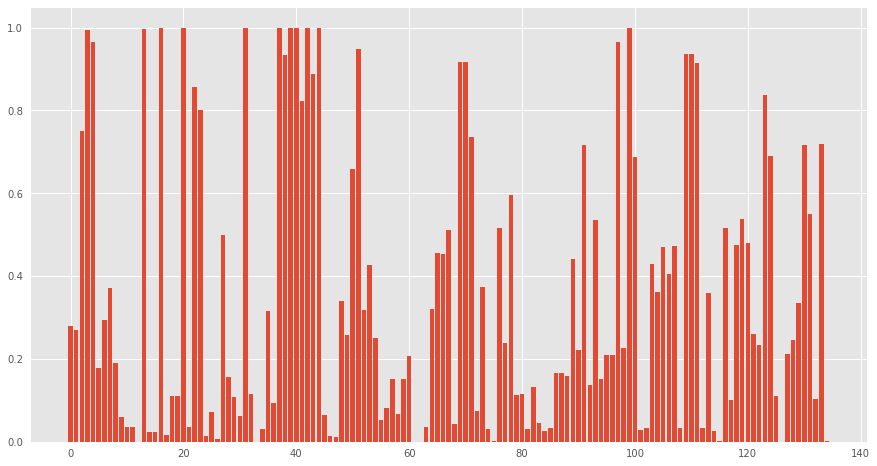

In [86]:
#### import numpy as np 
import matplotlib.pyplot as plt 

figure = plt.figure(figsize=(15,8))
pts = np.arange(len(y_dis_sim))

p = plt.bar(pts, height= y_dis_sim)


#for i in range(0,test_data.shape[0]):
#    p.patches[i].set_color(color_list[i])
    

plt.show()

In [103]:
time_arr = []
for i in range(0,len(disp_data)):
    time_arr.append(disp_data.iloc[i]['timeSpent'])


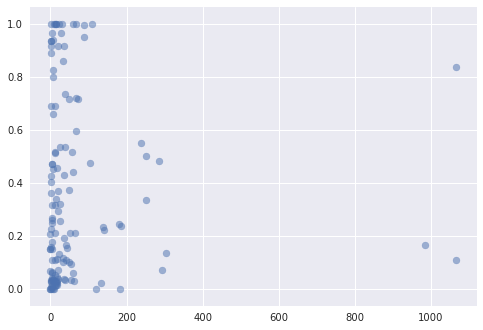

In [113]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Time is taken as X Co.Ordinate
#x = np.random.rand(N)

# Sim-Val is taken as Y-Co.ordinate
#y = np.random.rand(N)

#colors = np.random.rand(N)
#area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(time_arr,y_dis_sim,alpha=0.5)


plt.show()

<b style = "color : green" >(III) Altering the table structure to aid the Cytooscape Vis</b>

In [32]:
disp_data['Dest_url'] = ""

for i in range(0,len(disp_data)):
    if(i is not len(disp_data)-1 ):
        disp_data['Dest_url'].iloc[i] = disp_data['url'].iloc[i+1]
    else:
        disp_data['Dest_url'].iloc[i] = "END"

In [87]:
tst = disp_data
#tst.pop('id')
#tst.pop('lastVisitTime')
#tst.pop('title')
#tst.pop('visitCount')
#tst.pop('timeSpent')
#tst.pop('Internal_category')

tst.head()


,Unnamed: 0,id,lastVisitTime,title,url,visitCount,timeSpent,Internal_category,session,sim_val
0,211,421,7/4/2017 5:55:15 PM,python - UnicodeDecodeError: 'ascii' codec can...,https://stackoverflow.com/questions/18649512/u...,1,NaN,General,0,0.279421
2,209,423,7/4/2017 5:59:32 PM,python - How to fix: UnicodeDecodeError: 'asci...,https://stackoverflow.com/questions/21129020/h...,1,3.0,General,16,0.269056
3,208,427,7/4/2017 6:08:04 PM,Numerical Python | Release notes for Numerical...,https://sourceforge.net/projects/numpy/files//...,1,NaN,General,0,0.749879
4,207,430,7/4/2017 6:09:33 PM,Numerical Python - Browse /NumPy at SourceForg...,https://sourceforge.net/projects/numpy/files/N...,1,89.0,General,15,0.993417
5,206,429,7/4/2017 6:09:36 PM,Numerical Python - Browse Files at SourceForge...,https://sourceforge.net/projects/numpy/files/,2,3.0,General,15,0.964643


<b style = "color : green" >(IV) Exporting the Final Dataframe to .csv file to visualise</b>

In [33]:
disp_data.to_csv("~/Desktop/res.csv", sep=',', encoding='utf-8')